<!--NAVIGATION-->
< [高级索引](02.07-Fancy-Indexing.ipynb) | [目录](Index.ipynb) | [格式化数据：NumPy里的结构化数组](02.09-Structured-Data-NumPy.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/02.08-Sorting.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Sorting Arrays

# 數組排序

> This section covers algorithms related to sorting values in NumPy arrays.
These algorithms are a favorite topic in introductory computer science courses: if you've ever taken one, you probably have had heard about *insertion sorts*, *selection sorts*, *merge sorts*, *quick sorts*, *bubble sorts*, and many, many more. All are means of accomplishing a similar task: sorting the values in a list or array.

本小節我們會介紹對NumPy數組進行排序的算法。這些算法在基礎計算機科學領域是很熱門的課題：如果你學習過相關的課程的話，你可能聽過*插入排序*、*選擇排序*、*歸併排序*、*快速排序*、*冒泡排序*和其他很多很多名詞。這些都是為了完成一件工作：對數組進行排序。

In [1]:
import numpy as np
y=np.random.randint(low=30,high=40,size=(100))
y

array([38, 35, 39, 32, 35, 37, 34, 39, 37, 38, 33, 30, 34, 39, 33, 30, 37,
       35, 31, 35, 31, 36, 38, 33, 38, 34, 30, 31, 36, 31, 34, 30, 38, 37,
       36, 37, 32, 33, 38, 33, 32, 39, 39, 35, 32, 37, 39, 33, 31, 34, 37,
       38, 39, 37, 38, 33, 31, 30, 30, 30, 30, 33, 35, 35, 30, 39, 32, 36,
       30, 31, 35, 33, 38, 32, 35, 31, 38, 32, 33, 39, 32, 38, 32, 32, 37,
       36, 33, 33, 39, 33, 34, 33, 38, 37, 37, 32, 33, 36, 33, 36])

In [2]:
np.unique(y)

array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

In [3]:
np.random.seed(5)
x=np.random.randint(low=5,high=80,size=(3,5))
x

array([[66, 21, 78, 13, 67],
       [32, 35, 12, 20, 58],
       [32, 49, 70, 52, 35]])

In [4]:
np.sort(x)

array([[13, 21, 66, 67, 78],
       [12, 20, 32, 35, 58],
       [32, 35, 49, 52, 70]])

In [5]:
np.random.seed(10)
x=np.random.randint(low=5,high=80,size=(10))
x

array([14, 20, 69, 33, 34, 13, 78,  5, 45, 41])

In [6]:
#argsort returns indices of the sorted data in the original array
np.argsort(x)

array([7, 5, 0, 1, 3, 4, 9, 8, 2, 6])

In [7]:
math_scores = np.array([82,75,48, 91, 68, 85, 52, 35, 78, 57])
student_names = np.array(['Gokul', 'Paul', 'Andrew', 'George', 'Shyam', 'Sundar', 'James', 'Vinoth', 'David', 'Johnson'])
print(math_scores)
print(student_names)

[82 75 48 91 68 85 52 35 78 57]
['Gokul' 'Paul' 'Andrew' 'George' 'Shyam' 'Sundar' 'James' 'Vinoth'
 'David' 'Johnson']


In [8]:
#sort math scores and align the student names 
#for the corresponding sorted  math scores
print(np.sort(math_scores))
student_names[np.argsort(math_scores)]
x

[35 48 52 57 68 75 78 82 85 91]


array([14, 20, 69, 33, 34, 13, 78,  5, 45, 41])

In [9]:
#argsort on specific row
np.argsort(x[1])

array([0])

> For example, a simple *selection sort* repeatedly finds the minimum value from a list, and makes swaps until the list is sorted. We can code this in just a few lines of Python:

例如，一個簡單的*選擇排序*會重複尋找列表中最小的值，然後和當前值進行交換，直到列表排序完成。我們可以在Python中用簡單的幾行代碼完成這個算法：

In [10]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:]) # 寻找子数组中的最小值的索引序号
        (x[i], x[swap]) = (x[swap], x[i]) # 交换当前值和最小值
    return x

In [11]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

> As any first-year computer science major will tell you, the selection sort is useful for its simplicity, but is much too slow to be useful for larger arrays.
For a list of $N$ values, it requires $N$ loops, each of which does on order $\sim N$ comparisons to find the swap value.
In terms of the "big-O" notation often used to characterize these algorithms (see [Big-O Notation](#Aside:-Big-O-Notation)), selection sort averages $\mathcal{O}[N^2]$: if you double the number of items in the list, the execution time will go up by about a factor of four.

任何一個5年的計算機科學專業都會教你，選擇排序很簡單，但是對於大的數組來說運行效率就不夠了。對於數組具有$N$個值，它需要$N$次循環，每次循環中需要$\sim N$次比較和尋找來交換元素。 *大O*表示法經常用來對算法性能進行定量分析（參見[大O複雜度](#Aside:-Big-O-Notation)），選擇排序平均需要$\mathcal{O}[N^2]$：如果列表中的元素個數加倍，執行時間增長大約是原來的4倍。

> Even selection sort, though, is much better than my all-time favorite sorting algorithms, the *bogosort*:

甚至選擇排序也遠比下面這個*bogo排序*算法有效地多，這是作者最喜愛的排序算法：

In [12]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [13]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

> This silly sorting method relies on pure chance: it repeatedly applies a random shuffling of the array until the result happens to be sorted.
With an average scaling of $\mathcal{O}[N \times N!]$, (that's *N* times *N* factorial) this should–quite obviously–never be used for any real computation.

這個算法完全依賴於概率：它重複的對數組進行隨機的亂序直到結果剛好是正確排序為止。這個算法平均需要$\mathcal{O}[N \times N!]$，即*N*乘以*N*的階乘，明顯的，在真實情況下，它不應該被用於排序計算。

> Fortunately, Python contains built-in sorting algorithms that are *much* more efficient than either of the simplistic algorithms just shown. We'll start by looking at the Python built-ins, and then take a look at the routines included in NumPy and optimized for NumPy arrays.

幸運的是，Python內建有了排序算法，比我們剛才提到那些簡單的算法都要高效。我們從Python內建的排序開始介紹，然後再去討論NumPy中為了數組優化的排序函數。

## Fast Sorting in NumPy: ``np.sort`` and ``np.argsort``

## NumPy中快速排序：`np.sort` 和 `np.argsort`

> Although Python has built-in ``sort`` and ``sorted`` functions to work with lists, we won't discuss them here because NumPy's ``np.sort`` function turns out to be much more efficient and useful for our purposes.
By default ``np.sort`` uses an $\mathcal{O}[N\log N]$, *quicksort* algorithm, though *mergesort* and *heapsort* are also available. For most applications, the default quicksort is more than sufficient.

雖然Python有內建的`sort`和`sorted`函數可以用來對列表進行排序，我們在這裡不討論它們。因為NumPy的`np.sort`函數有著更加優秀的性能，而且也更滿足我們要求。默認情況下`np.sort`使用的是$\mathcal{O}[N\log N]$*快速排序*排序算法，*歸併排序*和*堆排序*也是可選的。對於大多數的應用場景來說，默認的快速排序都能滿足要求。

> To return a sorted version of the array without modifying the input, you can use ``np.sort``:

對數組進行排序，返回排序後的結果，不改變原始數組的數據，你應該使用`np.sort`：

In [14]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [15]:
x.sort()  # sort the array in-place
print(x)

[1 2 3 4 5]


In [16]:
x = np.array([2, 1, 4, 3, 5])  # instead returns the indices of the sorted 
i = np.argsort(x)
print(i)

[1 0 3 2 4]


> The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on.
These indices can then be used (via fancy indexing) to construct the sorted array if desired:

結果的第一個元素是數組中最小元素的序號，第二個元素是數組中第二小元素的序號，以此類推。這些序號可以通過高級索引的方式使用，從而獲得一個排好序的數組：更好的問題應該是，假如我們希望獲得數組中第二、三小的元素，我們可以這樣做：

```python
x[i[1:3]]
```

In [17]:
x[i]

array([1, 2, 3, 4, 5])

### Sorting along rows or columns 按照行或列进行排序

> A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the ``axis`` argument. For example:

NumPy的排序算法可以沿著多維數組的某些軸`axis`進行，如行或者列。例如：

In [18]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [19]:
np.sort(X, axis=0)  # sort by row

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [20]:
np.sort(X, axis=1)   # sort by col

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## Partial Sorts: Partitioning

## 部分排序：分區

> Sometimes we're not interested in sorting the entire array, but simply want to find the *k* smallest values in the array. NumPy provides this in the ``np.partition`` function. ``np.partition`` takes an array and a number *K*; the result is a new array with the smallest *K* values to the left of the partition, and the remaining values to the right, in arbitrary order:

有時候我們並不是需要對整個數組排序，而僅僅需要找到數組中的*K*個最小值。 NumPy提供了`np.partition`函數來完成這個任務；結果會分為兩部分，最小的*K*個值位於結果數組的左邊，而其餘的值位於數組的右邊，順序隨機：

In [21]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

> Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values. Within the two partitions, the elements have arbitrary order. Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

你可以看到結果中最小的三個值在左邊，其餘4個值位於數組的右邊，每個分區內部，元素的順序是任意的。和排序一樣，我們可以按照任意維度對一個多維數組進行分區：

In [22]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

> The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.Finally, just as there is a ``np.argsort`` that computes indices of the sort, there is a ``np.argpartition`` that computes indices of the partition.
We'll see this in action in the following section.

結果中每行的前兩個元素就是該行最小的兩個值，該行其餘的值會出現在後面。最後，就像`np.argsort`函數可以返回排好序的元素序號一樣，`np.argpartition`可以計算分區後元素的序號。後面的例子中我們會看到它的使用。

## Example: k-Nearest Neighbors

## 例子：k近鄰

> Let's quickly see how we might use this ``argsort`` function along multiple axes to find the nearest neighbors of each point in a set.
We'll start by creating a random set of 10 points on a two-dimensional plane.
Using the standard convention, we'll arrange these in a $10\times 2$ array:

下面我們使用`argsort`沿著多個維度來尋找每個點的最近鄰。首先在一個二維平面上創建10個隨機點數據。按照慣例，這將是一個$10\times 2$的數組：

In [23]:
X = rand.rand(10, 2)

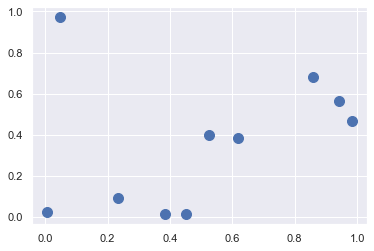

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 图表风格，seaborn
plt.scatter(X[:, 0], X[:, 1], s=100);

> Now we'll compute the distance between each pair of points.
Recall that the squared-distance between two points is the sum of the squared differences in each dimension;
using the efficient broadcasting ([Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb)) and aggregation ([Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb))  routines provided by NumPy we can compute the matrix of square distances in a single line of code:

現在讓我們來計算每兩個點之間的距離。距離平方的定義是兩點坐標差的平方和。應用廣播（[在數組上計算：廣播](02.05-Computation-on-arrays-broadcasting.ipynb)）和聚合([聚合：Min, Max, 以及其他](02.04-Computation-on-arrays-aggregates.ipynb))函數，我們可以使用一行代碼就能計算出所有點之間的距離平方：

In [25]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

> This operation has a lot packed into it, and it might be a bit confusing if you're unfamiliar with NumPy's broadcasting rules. When you come across code like this, it can be useful to break it down into its component steps:

上面的這行代碼包含很多的內容值得探討，如果對於不是特別熟悉廣播機制的讀者來說，看起來可能會讓人難以理解。當你讀到這樣的代碼的時候，將它們打散成一步步的操作會有幫助：

In [26]:
# 計算每兩個點之間的坐標距離
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [27]:
# 計算距離的平方
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [28]:
# 按照最後一個維度求和
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [29]:
#你可以檢查這個矩陣的對角線元素，對角線元素的值是點與其自身的距離平方，應該全部為0：
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

> It checks out!
With the pairwise square-distances converted, we can now use ``np.argsort`` to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

確認正確。現在我們已經有了一個距離平方的矩陣，然後就可以使用`np.argsort`函數來按照每行來排序。最左邊的列就會給出每個點的最近鄰：

In [30]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


> Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.By using a full sort here, we've actually done more work than we need to in this case. If we're simply interested in the nearest $k$ neighbors, all we need is to partition each row so that the smallest $k + 1$ squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the ``np.argpartition`` function:

第一列是0到9的數字：這是因為距離每個點最近的是自己，正如我們預料的一樣。上面我們進行了完整的排序，事實上我們並不需要這麼做。如果我們只是對最近的$K$個鄰居感興趣的話，我們可以使用分區來完成，只需要在距離平方矩陣中對每行進行$K+1$分區，只需要調用`np.argpartition`函數即可：

In [31]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

> In order to visualize this network of neighbors, let's quickly plot the points along with lines representing the connections from each point to its two nearest neighbors:

為了展示最近鄰的網絡結構，我們在圖中為每個點和它最近的兩個點之間連上線：

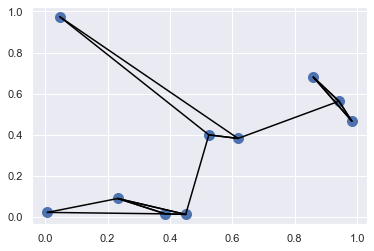

In [32]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# 為每個點和它最近的兩個點之間連上線
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # 從X[i]連線到X[j]
        # 使用一些zip的魔術方法畫線
        plt.plot(*zip(X[j], X[i]), color='black')

> Each point in the plot has lines drawn to its two nearest neighbors.
At first glance, it might seem strange that some of the points have more than two lines coming out of them: this is due to the fact that if point A is one of the two nearest neighbors of point B, this does not necessarily imply that point B is one of the two nearest neighbors of point A.

圖上的每個點都和與它最近的兩個點相連。初看起來，你可能注意到有些點的連線可能超過2條，這很奇怪：實際原因是如果A是B的最近兩個近鄰之一，並不代表著B也必須是A的最近兩個近鄰之一。

> Although the broadcasting and row-wise sorting of this approach might seem less straightforward than writing a loop, it turns out to be a very efficient way of operating on this data in Python.
You might be tempted to do the same type of operation by manually looping through the data and sorting each set of neighbors individually, but this would almost certainly lead to a slower algorithm than the vectorized version we used. The beauty of this approach is that it's written in a way that's agnostic to the size of the input data: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.

雖然使用廣播和逐行排序的方式完成任務可能沒有使用循環來的直觀，但是在Python中這是一種非常有效的方式。你可能忍不住使用循環的方式對每個點去計算它相應的最近鄰，但是這種方式幾乎肯定會比我們前面使用的向量化方案要慢很多。向量化的解法還有一個優點，那就是它不關心數據的尺寸：我們可以使用同樣的代碼和方法計算100個點或1,000,000個點以及任意維度數的數據的最近鄰。

> Finally, I'll note that when doing very large nearest neighbor searches, there are tree-based and/or approximate algorithms that can scale as $\mathcal{O}[N\log N]$ or better rather than the $\mathcal{O}[N^2]$ of the brute-force algorithm. One example of this is the KD-Tree, [implemented in Scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html).

最後，需要說明的是，當對一個非常大的數據集進行最近鄰搜索時，還有一種基於樹或相似的算法能夠將時間複雜度從$\mathcal{O}[N^2]$優化到$\mathcal{O}[N\log N]$或更好。其中一個例子是[KD-Tree](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html)。

## Aside: Big-O Notation

## 額外內容：大 O 複雜度

> Big-O notation is a means of describing how the number of operations required for an algorithm scales as the input grows in size.
To use it correctly is to dive deeply into the realm of computer science theory, and to carefully distinguish it from the related small-o notation, big-$\theta$ notation, big-$\Omega$ notation, and probably many mutant thereof.
While these distinctions add precision to statements about algorithmic scaling, outside computer science theory exams and the remarks of pedantic blog commenters, you'll rarely see such distinctions made in practice.
Far more common in the data science world is a less rigid use of big-O notation: as a general (if imprecise) description of the scaling of an algorithm.
With apologies to theorists and pedants, this is the interpretation we'll use throughout this book.

大O複雜度是一種衡量隨著輸入數據的增加，需要執行的操作的數量的量級情況的指標。要正確使用它，需要深入了解計算機科學的理論知識，要和其他相關的概念如小O複雜度，大$\theta$複雜度，大$\Omega$複雜度區分開來，更加不容易。雖然精確地描述出這些複雜度是屬於算法的範疇，除了學院派計算機科學理論的測驗和評分以外，你在其他應用領域很難看到這些嚴格的定義和劃分。在數據科學領域中，我們不會使用這樣死板的大O複雜度概念，雖然這和算法領域的概念在精確程度上有一定差距。帶著對理論學者和學院派的歉意，本書將一直使用對大O複雜度的這種非精確概念解釋。

> Big-O notation, in this loose sense, tells you how much time your algorithm will take as you increase the amount of data.
If you have an $\mathcal{O}[N]$ (read "order $N$") algorithm that takes 1 second to operate on a list of length *N*=1,000, then you should expect it to take roughly 5 seconds for a list of length *N*=5,000.
If you have an $\mathcal{O}[N^2]$ (read "order *N* squared") algorithm that takes 1 second for *N*=1000, then you should expect it to take about 25 seconds for *N*=5000.

大O複雜度，簡單來說，會告訴你當你的數據增大時，你的算法運行需要的時間。例如你有一個$\mathcal{O}[N]$（英文讀作"Order $N$"）的算法，對於*N*=1000的數據量，它需要運行1秒，那麼對於*N*=5000的數據量，算法需要執行的時間就為5秒。如果你的算法複雜度為$\mathcal{O}[N^2]$（英文讀作"Order *N* squared"），對於*N*=1000的數據量需要運行1秒，那麼你可以預期當數據量增長為*N*=5000時，運行時間為25秒。

> For our purposes, the *N* will usually indicate some aspect of the size of the dataset (the number of points, the number of dimensions, etc.). When trying to analyze billions or trillions of samples, the difference between $\mathcal{O}[N]$ and $\mathcal{O}[N^2]$ can be far from trivial!

對於我們的目標來說，*N*通常代表著數據集的大小（數據點的數量，維度數等）。當我們需要分析的數據樣本量達到百萬級或十億級時，$\mathcal{O}[N]$和$\mathcal{O}[N^2]$之間的差距將會是巨大的。

> Notice that the big-O notation by itself tells you nothing about the actual wall-clock time of a computation, but only about its scaling as you change *N*.
Generally, for example, an $\mathcal{O}[N]$ algorithm is considered to have better scaling than an $\mathcal{O}[N^2]$ algorithm, and for good reason. But for small datasets in particular, the algorithm with better scaling might not be faster.
For example, in a given problem an $\mathcal{O}[N^2]$ algorithm might take 0.01 seconds, while a "better" $\mathcal{O}[N]$ algorithm might take 1 second.
Scale up *N* by a factor of 1,000, though, and the $\mathcal{O}[N]$ algorithm will win out.

請記住大O複雜度本身並不能告訴你實際上運算消耗的時間，它僅僅能夠告訴你當*N*變化時，運行時間會怎樣隨之發生變化。通常來說，$\mathcal{O}[N]$複雜度的算法被認為肯定要比$\mathcal{O}[N^2]$複雜度的算法要好。但對於小的數據集來說，好的大O複雜度算法並不一定能帶來更快的執行效率。例如，某個特定情況下，$\mathcal{O}[N^2]$複雜度的算法可能需要0.01秒的運行時間而$\mathcal{O}[N]$複雜度的算法可能需要1秒。但是如果將*N*增大1000倍，那麼$\mathcal{O}[N]$複雜度的算法將會勝出。

> Even this loose version of Big-O notation can be very useful when comparing the performance of algorithms, and we'll use this notation throughout the book when talking about how algorithms scale.

我們這裡使用的這種非嚴格定義的大O複雜度對於算法的性能也是有指示意義的，在本書的後續部分當我們討論到算法範疇時都會應用到它。

<!--NAVIGATION-->
< [高级索引](02.07-Fancy-Indexing.ipynb) | [目录](Index.ipynb) | [格式化数据：NumPy里的结构化数组](02.09-Structured-Data-NumPy.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/02.08-Sorting.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
